In [116]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
plt.rcParams['figure.figsize']=(20,10)

In [3]:
!pip install pandas

In [4]:
data = pd.read_csv(r'C:\Users\krati\Downloads\archive (3)\healthcare-dataset-stroke-data.csv')

In [5]:
data # our data is imported

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


uniques values
 ['Male' 'Female' 'Other']
value counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

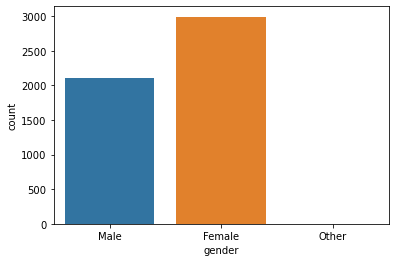

In [6]:
print('uniques values\n', data['gender'].unique())
print('value counts\n',data['gender'].value_counts())
sns.countplot(x='gender',data=data)

Gender with stroke


<AxesSubplot:xlabel='gender', ylabel='count'>

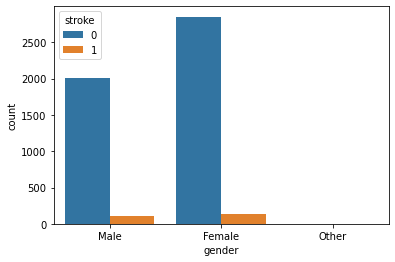

In [7]:
print('Gender with stroke')
sns.countplot(x='gender',hue='stroke',data=data)

In [8]:
# Preparing our data 
#exploratory data analysis
data.info() 
# below we can see that all column except bmi has 5110 data -> it means it does not have null values
#but bmi -> 4909 -> contains null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
data.shape # gives row and column

(5110, 12)

In [10]:
data.isnull().sum()  # kisme kitni null values hai unka sum dega
# ek ek values ko check krega or dekhega null hai ki ni or uske a/c true false dega

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# Handling missing Values
# let's fill null values
data['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [12]:
data['bmi'].value_counts()  # counting ki ek type ki values kitni baar aa rhi hai

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [13]:
data['bmi'].describe()  # count, mean, sd, min value, max, --- saari cheje batayega bmi ke baare me

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [14]:
#fiiling null values with mean, we can also fill with others like min, max, etc
data['bmi'].fillna(data['bmi'].mean())  # here inplace is false so it prints value here only, not changing in the original dataset

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [15]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)  # also changes in original dataset because inplace=true

In [16]:
data['bmi'].describe()  # now we can see that the count increases

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [17]:
data.isnull().sum() #now there is no null value in the bmi
# stroke is dependent on rest of the values
# rest attributes are independent also called features

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
# Feature Generation 
# already we have features so we don't need more

# Feature Selection


In [20]:
# if >50 columns then data does not predict accurately so we take 11 - 12 columns only
# in our dataset id column is useless so we will drop it

In [21]:
data.drop('id', axis = 1, inplace = True)  # axis = 1 for column and 0 for rows

In [22]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [23]:
#Outlier Removation
# outlier means too different values, it affects the average either in severe increment or decrement

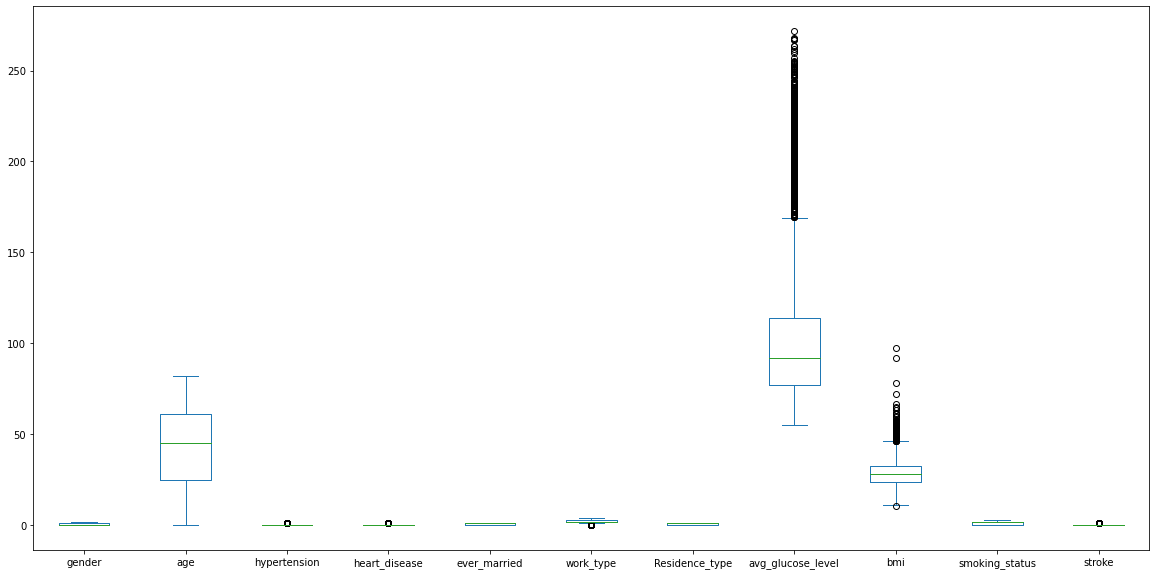

In [117]:
data.plot(kind = 'box')
plt.show()  

# jahan par sab cheez import kr rhe the waha 
# %matplotlib
# plt.rcParams() ... extra add kiye to increase the figure size
#boxplot

In [25]:
# abobe fig ---> we can see that avg_glucose and bmi me outliers hai
# now we will work on avg_glucoe_level ---> dtype = float

In [26]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [27]:
data[data['avg_glucose_level'] > 114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [28]:
#hm saare outliers remove nhi krenge kyuki aisa krne se us particular person ka stroke predict nhi kr payenge
#Now we will do label encoding because our machine understands only numbers(0 and 1). So we have to convert our data into 
#the number to make our machine understand the data.

In [29]:
# first we will get worktype to know the types of work.
data['work_type'].unique()
# We can assign 1,2,3... to the types of work for basic idea.
#We are using Label Encoding.

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

# label encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [31]:
#Now we are converting values of columns into the form of numbers.
gender=enc.fit_transform(data['gender'])
#here, we transfored one column 'gender'.Rest will go in the same way and store in these variables.
ever_married=enc.fit_transform(data['ever_married'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
smoking_status=enc.fit_transform(data['smoking_status'])

In [32]:
#Now, we will replace values in the actual dataset from these new value(stored in variables in upper cell).
data['gender']=gender
data['ever_married']=ever_married
data['work_type']=work_type
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status

In [33]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [34]:
data.info()
#jin jin ke data type object the wo ab int me convert ho gye h.
#encoding in done.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Spliting the data for train and test (PARTITIONING)



X ---train_X, test_Y 80/20  # 80 - for training, 20 - for testing
Y ---train_Y, test_Y

Here x is feature and y is our target variable

In [36]:
X = data.drop('stroke', axis = 1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [37]:
Y = data['stroke']
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=None)
#random_state= how data will be distributed (here, there is no particular pattern)
#X_train is question Y_train is the answer in a question paper

X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3681,0,16.0,0,0,0,2,1,89.45,28.893237,0
153,1,68.0,0,0,1,3,1,77.82,27.500000,3
4276,0,29.0,0,0,0,3,0,67.56,19.600000,0
3378,1,51.0,0,0,0,3,0,219.17,29.800000,2
1419,1,43.0,0,0,1,2,1,81.94,27.700000,3
...,...,...,...,...,...,...,...,...,...,...
440,0,22.0,0,0,0,2,1,130.34,22.000000,2
4280,0,18.0,0,0,0,2,0,88.85,36.200000,0
2902,1,78.0,1,1,1,3,0,106.41,27.300000,2
4211,0,81.0,0,1,0,3,1,99.44,27.700000,0


In [39]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3061,0,41.00,0,0,1,2,0,65.40,36.9,1
52,0,79.00,0,1,1,2,0,127.29,27.7,2
34,1,48.00,0,0,0,0,1,84.20,29.7,2
3316,0,82.00,0,0,1,3,1,84.78,33.6,1
996,1,0.24,0,0,0,4,0,118.87,16.3,0
...,...,...,...,...,...,...,...,...,...,...
496,1,5.00,0,0,0,4,0,122.19,35.0,0
4465,0,3.00,0,0,0,4,1,78.79,22.6,0
1069,1,5.00,0,0,0,4,0,84.30,16.0,0
2171,1,18.00,0,0,0,2,0,120.58,21.5,2


In [40]:
Y_train

3681    0
153     1
4276    0
3378    0
1419    0
       ..
440     0
4280    0
2902    0
4211    0
2683    0
Name: stroke, Length: 4088, dtype: int64

In [41]:
Y_test

3061    0
52      1
34      1
3316    0
996     0
       ..
496     0
4465    0
1069    0
2171    0
3450    0
Name: stroke, Length: 1022, dtype: int64

# NORMALIZE

In [42]:
data.describe()
#distance between our data is pretty large, so we will scale down it into a particular range( so that our model can travel.)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [43]:
# there is a large difference between mean of age and hypertension,
# so we need a scalar quantity that will lessen the difference

In [119]:
#scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()  

In [45]:
X_train_std = std.fit_transform(X_train)        # we do not transform y as it has only 0 & 1
X_test_std = std.transform(X_test)

#what is data leakage. 
# std will understand the data of train and transform it but not understand (know) test just transform data because of data leakage

In [46]:
X_train_std   # we can now see that the difference is not more like earlier

array([[-0.8340046 , -1.19796997, -0.32012673, ..., -0.37722725,
         0.00488704, -1.27734058],
       [ 1.1966153 ,  1.09825793, -0.32012673, ..., -0.63376018,
        -0.17490504,  1.51057628],
       [-0.8340046 , -0.623913  , -0.32012673, ..., -0.86007384,
        -1.19437086, -1.27734058],
       ...,
       [ 1.1966153 ,  1.53984022,  3.12376291, ..., -0.00312592,
        -0.2007143 ,  0.58127066],
       [-0.8340046 ,  1.6723149 , -0.32012673, ..., -0.15686922,
        -0.14909578, -1.27734058],
       [-0.8340046 ,  1.14241616, -0.32012673, ..., -0.48729598,
        -1.15565697, -1.27734058]])

In [47]:
X_test_std

array([[-0.8340046 , -0.09401425, -0.32012673, ..., -0.90771882,
         1.03813024, -0.34803496],
       [-0.8340046 ,  1.58399845, -0.32012673, ...,  0.45744222,
        -0.14909578,  0.58127066],
       [ 1.1966153 ,  0.21509335, -0.32012673, ..., -0.49303103,
         0.10899684,  0.58127066],
       ...,
       [ 1.1966153 , -1.68371049, -0.32012673, ..., -0.49082524,
        -1.65893756, -1.27734058],
       [ 1.1966153 , -1.10965352, -0.32012673, ...,  0.30943397,
        -0.94918288,  0.58127066],
       [ 1.1966153 ,  0.25925158,  3.12376291, ..., -0.31524466,
         0.54775428, -0.34803496]])

# Training

In [49]:
#we can't say that which algorithm is better ...after applying we get to know about that

#first we are going to apply decision tree
#here we make tree and its branches that will denote its diff feature 


# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() 
#decisiontree has many parameter like how many branches it have how many leaf it should have we can change those parameter and improve accuracy


In [52]:
dt.fit(X_train_std,Y_train)                 #here we train the data

DecisionTreeClassifier()

In [120]:
dt.feature_importances_             #this will show that how much a feature is responsible for stroke as we see that age is more responsible for stroke than hypertension
#important features for stroke

array([0.02674818, 0.18984853, 0.01614906, 0.0163072 , 0.02068943,
       0.03517382, 0.02819419, 0.33334431, 0.26151599, 0.0720293 ])

In [54]:
X_train.columns            #it will show thw column name so that we identify the above values
#According to decision tree age, avy_glucose_level,bmi are the most important factor

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [122]:
Y_pred=dt.predict(X_test_std)
Y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
Y_test          #we see that 39 have the chances of having stoke but decision tree tell that it does not having stroke

3061    0
52      1
34      1
3316    0
996     0
       ..
496     0
4465    0
1069    0
2171    0
3450    0
Name: stroke, Length: 1022, dtype: int64

In [57]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[919  48]
 [ 44  11]]


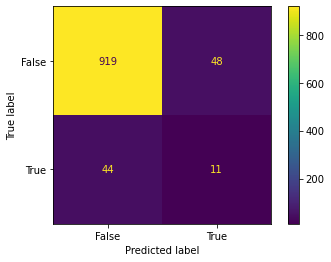

In [58]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [59]:
#now we directly compare them using metric to get the accuracy score for classification
from sklearn.metrics import accuracy_score

In [60]:
ac_dt=accuracy_score(Y_test,Y_pred)       #it will take only two parameter actual value and the value we predict           ............we can see that there is 90% accuracy

In [123]:
ac_dt

0.9099804305283757

In [62]:
joblib.dump(dt, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

# Logistic Regression

In [63]:
#Logistic Regression  for classification                
#its threshold value is 50% if after calculation it will get value more than that than it will have stroke

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [65]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [66]:
Y_pred_lr=lr.predict(X_test_std)

In [67]:
Y_test

3061    0
52      1
34      1
3316    0
996     0
       ..
496     0
4465    0
1069    0
2171    0
3450    0
Name: stroke, Length: 1022, dtype: int64

[[919  48]
 [ 44  11]]


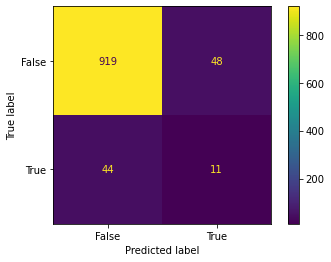

In [68]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [69]:
ac_lr=accuracy_score(Y_test,Y_pred)             #it give 94% accuracy
ac_lr

0.9099804305283757

In [70]:
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

# KNN(K nearest neighbour)

In [71]:

#there are two classes and we need to find in which class we belong like if k=3 we find 3 nearest neighbour then we see 
#which class is in majority
#how we decide the value of k          bydefault it is 5 but we can change it
#it is calculating the distance so we need to use std values but for decision tree and random forest it is not necessary

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [73]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [74]:
Y_pred=knn.predict(X_test_std)

[[967   0]
 [ 55   0]]


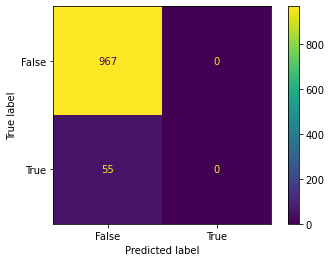

In [75]:
#confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [76]:
ac_knn=accuracy_score(Y_test,Y_pred)
ac_knn         #lr is performing little better than knn

0.9461839530332681

In [77]:
joblib.dump(knn, 'kneighbour_classifier_model.pkl')

['kneighbour_classifier_model.pkl']

# Random Forest

In [78]:
#father of decision tree as it have more trees and majority of all the ans of 
#decision tree is the ans
#it reduces the problem of overfitting .....that will sometime accour in decision tree

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [125]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [81]:
Y_pred=rf.predict(X_test_std)

[[964   3]
 [ 55   0]]


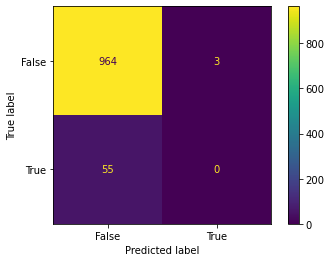

In [82]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [83]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [84]:
ac_rf              #93% accuracy and it will not getting affected if we use normal data

0.9432485322896281

In [85]:
joblib.dump(rf, 'random_forest_classifier_model.pkl')

['random_forest_classifier_model.pkl']

# SVM 

In [87]:
from sklearn.svm import SVC
sv=SVC()

In [124]:
sv.fit(X_train_std,Y_train)

SVC()

In [89]:
Y_pred=sv.predict(X_test_std)

[[967   0]
 [ 55   0]]


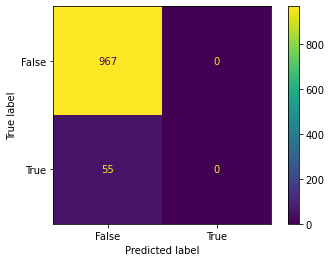

In [90]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [91]:
ac_svm=accuracy_score(Y_test,Y_pred)
ac_svm

0.9461839530332681

In [92]:
joblib.dump(sv, 'svm_model.pkl')

['svm_model.pkl']

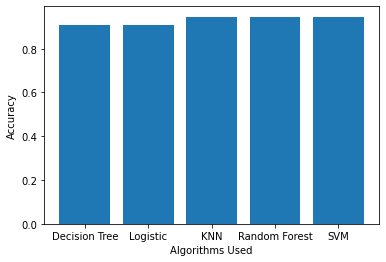

In [93]:
plt.bar(['Decision Tree', 'Logistic','KNN', 'Random Forest', 'SVM'], [ac_dt, ac_lr, ac_knn, ac_rf, ac_svm])
plt.xlabel("Algorithms Used")
plt.ylabel("Accuracy")
plt.show()

In [94]:
mymodel=lr.fit(X_train_std,Y_train)
lr.score(X_test_std,Y_test)         # for measuring the score
#we run again and again the split function and here also the value will change as it will divide diff all the times
# for test and train we cant say after running one time that this model is performing better as it will produce diff output

0.9461839530332681

In [95]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [96]:
for train_index,test_index in kf.split(data):
    print(train_index,test_index)

[1022 1023 1024 ... 5107 5108 5109] [   0    1    2 ... 1019 1020 1021]
[   0    1    2 ... 5107 5108 5109] [1022 1023 1024 ... 2041 2042 2043]
[   0    1    2 ... 5107 5108 5109] [2044 2045 2046 ... 3063 3064 3065]
[   0    1    2 ... 5107 5108 5109] [3066 3067 3068 ... 4085 4086 4087]
[   0    1    2 ... 4085 4086 4087] [4088 4089 4090 ... 5107 5108 5109]


In [97]:
#measure performance through k-fold 
def get_score(model, X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

In [98]:
sc_lr=get_score(LogisticRegression(),X_train,X_test,Y_train,Y_test)
sc_lr

C:\Users\krati\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9461839530332681

In [99]:
sc_dt=get_score(DecisionTreeClassifier() ,X_train,X_test,Y_train,Y_test)
sc_dt

0.9187866927592955

In [100]:
sc_svm=get_score(SVC() ,X_train,X_test,Y_train,Y_test)
sc_svm

0.9461839530332681

In [101]:
sc_rf=get_score(RandomForestClassifier() ,X_train,X_test,Y_train,Y_test)
sc_rf

0.9442270058708415

In [102]:
sc_knn=get_score(KNeighborsClassifier() ,X_train,X_test,Y_train,Y_test)
sc_knn

0.9403131115459883

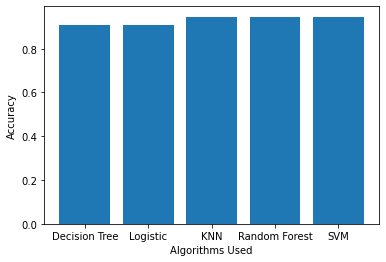

In [103]:
plt.bar(['Decision Tree', 'Logistic','KNN', 'Random Forest', 'SVM'], [ac_lr, ac_dt, ac_knn, ac_rf, ac_svm])
plt.xlabel("Algorithms Used")
plt.ylabel("Accuracy")
plt.show()

In [104]:
#statified is more better than k fold as in kfold we divide data but it must be possible that training only have same type of data and test have diff type of data that will may create a problem

In [105]:
def precision(tp,fp,fn,tn):
    return tp/(tp+fp)
p_svm=precision(967,0,55,0)
p_rf=precision(963,4,55,0)
p_knn=precision(962,5,55,0)
p_lr=precision(908,59,39,16)
p_dt=precision(908,59,39,16)



In [106]:
def recall(tp,fp,fn,tn):
    return tp/(tp+fn)
r_svm=recall(967,0,55,0)
r_rf=recall(963,4,55,0)
r_knn=recall(962,5,55,0)
r_lr=recall(908,59,39,16)
r_dt=recall(908,59,39,16)


In [107]:
def f1_factor(tp,fp,tn,fn):
    p=precision(tp,fp,tn,fn)
    r=recall(tp,fp,tn,fn)
    return 2*p*r/(p+r)

f_svm=f1_factor(967,0,55,0)
f_rf=f1_factor(963,4,55,0)
f_knn=f1_factor(962,5,55,0)
f_lr=f1_factor(908,59,39,16)
f_dt=f1_factor(908,59,39,16)


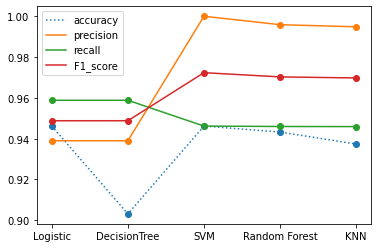

In [108]:
a=[0.9461839530332681,0.9031311154598826,0.9461839530332681,0.9432485322896281,0.9373776908023483]
b=['Logistic','DecisionTree','SVM','Random Forest','KNN']
pre=[p_lr,p_dt,p_svm,p_rf,p_knn]
rec=[r_lr,r_dt,r_svm,r_rf,r_knn]
f_factor=[f_lr,f_dt,f_svm,f_rf,f_knn]
plt.plot(b,a,':',label="accuracy")
plt.scatter(b,a)
plt.plot(b,pre,label="precision")
plt.scatter(b,pre)
plt.plot(b,rec,label="recall")
plt.scatter(b,rec)
plt.plot(b,f_factor,label="F1_score")
plt.scatter(b,f_factor)
plt.legend()
plt.show()

In [109]:
# 'Logistic','DecisionTree','SVM','Random Forest','KNN'
pre

[0.9389865563598759,
 0.9389865563598759,
 1.0,
 0.9958634953464323,
 0.9948293691830403]

In [110]:
rec

[0.9588173178458289,
 0.9588173178458289,
 0.9461839530332681,
 0.9459724950884086,
 0.9459193706981318]

In [111]:
f_factor

[0.9487983281086729,
 0.9487983281086729,
 0.9723479135243841,
 0.9702770780856422,
 0.9697580645161291]